In [1]:
import numpy as np  # Import NumPy library for numerical computations
import pandas as pd  # Import pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Import matplotlib library for data visualization
import seaborn as sns  # Import seaborn library for statistical data visualization
# Magic command to display matplotlib plots inline in Jupyter Notebook
%matplotlib inline 

In [2]:
# Read the CSV file into a DataFrame named 'dataset'.
dataset=pd.read_csv("1000_Companies.csv")

In [3]:
# Display the first few rows of the dataset
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
 # Display information about the dataset, including the data types and number of non-null values for each column.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [5]:
# Generate descriptive statistics of the dataset, including count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values for each numeric column.
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [6]:
# Check for missing values in the dataset and sum them up column-wise
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
# Check for duplicated rows in the dataset and count the number of duplicates
dataset.duplicated().sum()

1

In [8]:
dataset.drop_duplicates(inplace=True)  # Remove duplicate rows from the dataset.


In [9]:
columns_to_encode = ['State']  # Categorical column 'State' to be be encoded

from sklearn.preprocessing import LabelEncoder  # Import the LabelEncoder class from scikit-learn

# Initialize LabelEncoder
label_encoder = LabelEncoder()  # Create an instance of LabelEncoder

# Encode categorical columns
for column in columns_to_encode:  # Iterate through each column to encode
    dataset[column + '_Encoded'] = label_encoder.fit_transform(dataset[column])  # Encode the column and add the result as a new column

# Drop original categorical columns
dataset.drop(columns=columns_to_encode, inplace=True)  # Remove the original categorical columns from the dataset


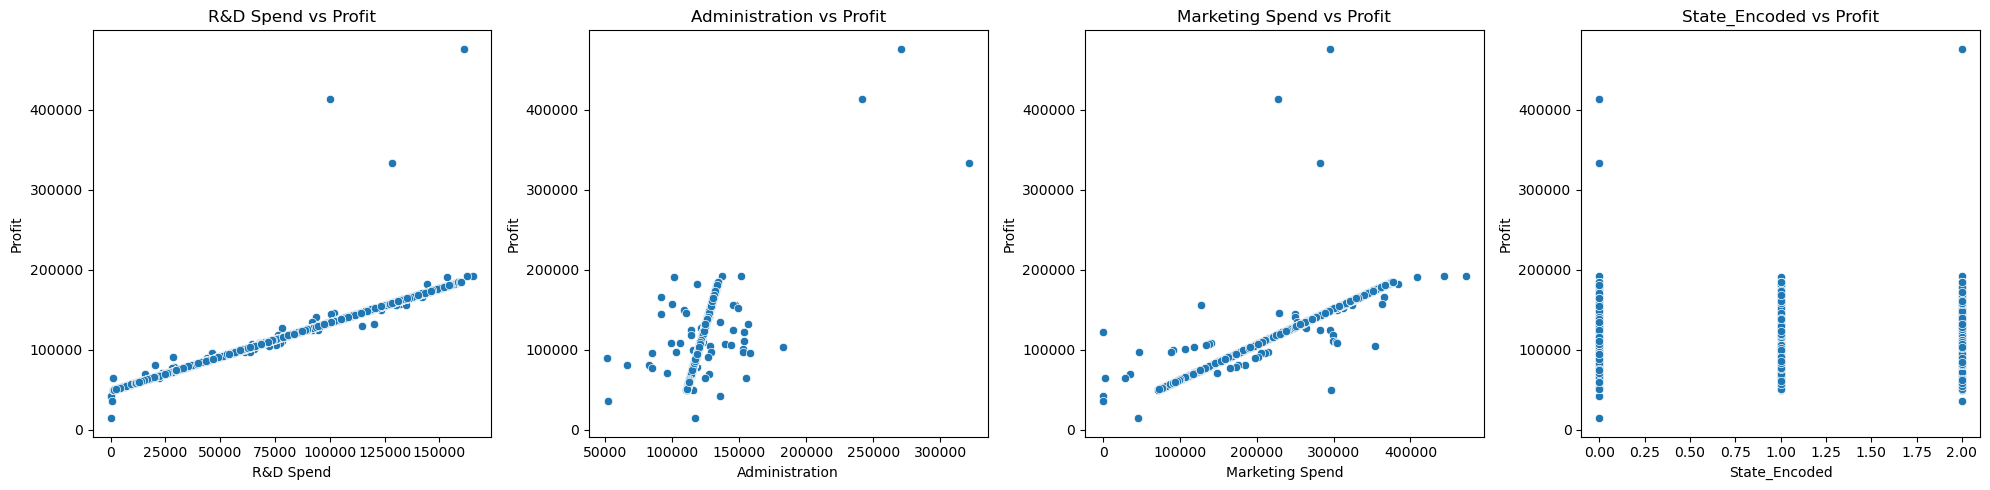

In [10]:
# Define the list of feature columns to be used for plotting
feature_columns = ['R&D Spend', 'Administration', 'Marketing Spend', 'State_Encoded']

# Create subplots with a single row and a number of columns equal to the number of feature columns,
# adjusting the figure size based on the number of columns for better visualization
fig, axes = plt.subplots(1, len(feature_columns), figsize=(len(feature_columns) * 5, 5))

# Iterate through each feature column and its corresponding index in the list
for i, column in enumerate(feature_columns):
    # Plot a scatter plot of the current feature against the target variable 'Profit',
    # using the specified column as the x-axis and 'Profit' as the y-axis
    sns.scatterplot(x=column, y='Profit', data=dataset, ax=axes[i])
    
    # Set the title of the subplot to indicate the relationship being visualized
    axes[i].set_title(f'{column} vs Profit')

# Adjust the layout of the subplots to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


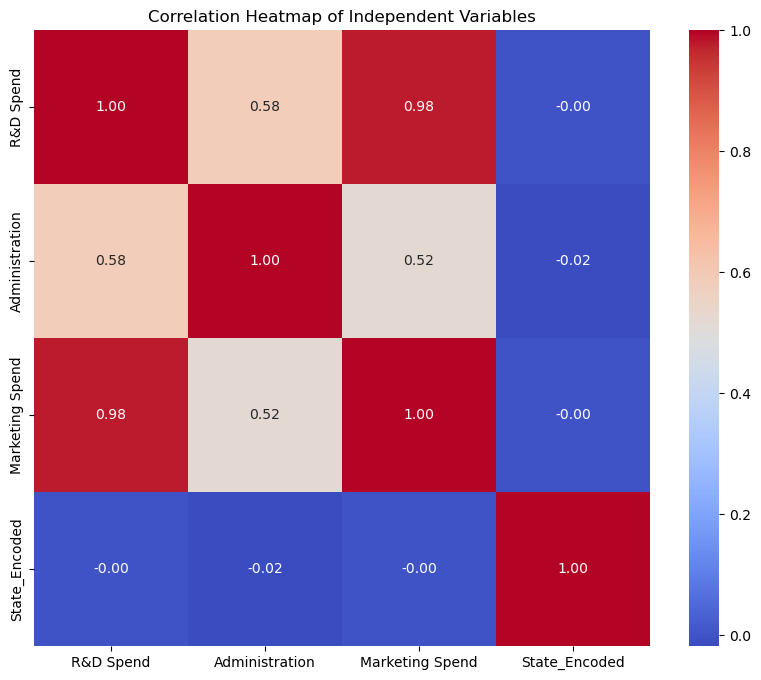

In [11]:
# Calculate the correlation matrix
corr = dataset[feature_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Independent Variables')
plt.show()

In [12]:
# Extracting the feature matrix X by dropping the 'Profit' column from the dataset
X = dataset.drop('Profit', axis=1)

# Extracting the target vector y containing only the 'Profit' column from the dataset
y = dataset['Profit']


In [13]:
from sklearn.model_selection import train_test_split  # Import the train_test_split function from scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  # Split the dataset into training and testing sets. X_train and y_train will contain the features and target variable for training, while X_test and y_test will contain the features and target variable for testing. The test_size parameter specifies the proportion of the dataset to include in the testing set, and the random_state parameter sets the random seed for reproducibility.


In [14]:
from sklearn.linear_model import LinearRegression  # Import LinearRegression class from scikit-learn's linear_model module
regressor = LinearRegression()  # Create an instance of the LinearRegression class, representing the regression model


In [15]:
# Fit the regressor model to the training data
regressor.fit(X_train, y_train)


LinearRegression()

In [16]:
# Use the trained regressor model to make predictions on the test data
y_pred = regressor.predict(X_test)


In [17]:
# Import the mean_absolute_error function from the sklearn.metrics module
from sklearn.metrics import mean_absolute_error

# Import the mean_squared_error function from the sklearn.metrics module
from sklearn.metrics import mean_squared_error

# Import the r2_score function from the sklearn.metrics module
from sklearn.metrics import r2_score


Mean Absolute Error (MAE):

Range: 0 to ∞
Lower values indicate better performance. MAE measures the average absolute errors between the predicted and actual values. It is not sensitive to outliers.

In [18]:
# Calculate the mean absolute error by comparing the true target values (y_test) with the predicted target values (y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the calculated mean absolute error
print("Mean Absolute Error:", mae)


Mean Absolute Error: 1576.21390933724


Mean Squared Error (MSE):
Range: 0 to ∞
Lower values indicate better performance. MSE measures the average of the squared differences between the predicted and actual values. It penalizes larger errors more than MAE and is sensitive to outliers.

In [19]:
# Importing the mean_squared_error function from the sklearn.metrics module
from sklearn.metrics import mean_squared_error

# Calculating the mean squared error between the true target values (y_test) and the predicted target values (y_pred)
mse = mean_squared_error(y_test, y_pred)

# Printing the mean squared error
print("Mean Square Error:", mse)


Mean Square Error: 39385874.83006552


Root Mean Squared Error (RMSE):

Range: 0 to ∞
Lower values indicate better performance. RMSE is the square root of MSE and provides an interpretable measure in the same units as the target variable.

In [20]:
import math  # Importing the math module to access mathematical functions and constants
rmse = math.sqrt(mse)  # Calculating the square root of the mean squared error (mse) to get the root mean square error (rmse)
print("Root mean Square Error", rmse)  # Printing the root mean square error


Root mean Square Error 6275.816666384186


Coefficient of Determination (R-squared score)
Range: 
−∞ to 1
Higher values indicate better performance. 
R Squared score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A value of 1 indicates that the model explains all the variability of the response data around its mean.

In [21]:
# Calculate the R-squared score using the predicted values (y_pred) and the true values (y_test).
r2 = r2_score(y_test, y_pred)

# Print the R-squared score.
print("R2 Score", r2)


R2 Score 0.975378369241497


Adjusted R-squared:

Range:
−∞ to 1
Higher values indicate better performance. Adjusted R2 adjusts the R2  value based on the number of predictors in the model and the sample size. It penalizes excessive use of predictors that do not improve the model's explanatory power.

In [22]:
# n is calculated as the length of the target variable y_test, representing the number of observations or the sample size.
n = len(y_test)

# k is determined by extracting the number of columns (predictors) in the feature matrix X_test.
k = X_test.shape[1]

# Calculate the adjusted R-squared score using the formula, which adjusts the R-squared value based on the sample size and the number of predictors in the model.
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Print the calculated adjusted R-squared score.
print("Adjusted R-squared:", adjusted_r2)


Adjusted R-squared: 0.9750753337860077
